In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!kaggle datasets download -d kshitij192/cars-image-dataset

cars-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cars-image-dataset.zip', 'r')
zip_ref.extractall('/content/Dataset')
zip_ref.close()

In [4]:
# import the libraries as shown below
import tensorflow as tf

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = [224,224]

train_path = '/content/Dataset/Cars Dataset/train'
valid__path = '/content/Dataset/Cars Dataset/test'

In [6]:
resnet152V2 = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=IMAGE_SIZE + [3],
    )

80134624/80134624 [==============================] - 5s 0us/step


In [7]:
for layer in resnet152V2.layers:
  layer.trainable = False

In [8]:
folders = glob('/content/Dataset/Cars Dataset/train/*')
folders

['/content/Dataset/Cars Dataset/train/Toyota Innova',
 '/content/Dataset/Cars Dataset/train/Rolls Royce',
 '/content/Dataset/Cars Dataset/train/Tata Safari',
 '/content/Dataset/Cars Dataset/train/Mahindra Scorpio',
 '/content/Dataset/Cars Dataset/train/Hyundai Creta',
 '/content/Dataset/Cars Dataset/train/Audi',
 '/content/Dataset/Cars Dataset/train/Swift']

In [9]:
x = Flatten()(resnet152V2.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs = resnet152V2.input, outputs = prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Dataset/Cars Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',)

Found 3352 images belonging to 7 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/Dataset/Cars Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 813 images belonging to 7 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-16-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
105/105 [==============================] - 62s 537ms/step - loss: 1.2167 - accuracy: 0.6077 - val_loss: 0.6680 - val_accuracy: 0.7921
Epoch 2/20
105/105 [==============================] - 48s 461ms/step - loss: 0.5048 - accuracy: 0.8443 - val_loss: 0.4864 - val_accuracy: 0.8376
Epoch 3/20
105/105 [==============================] - 47s 448ms/step - loss: 0.3715 - accuracy: 0.8828 - val_loss: 0.3755 - val_accuracy: 0.8721
Epoch 4/20
105/105 [==============================] - 48s 459ms/step - loss: 0.2670 - accuracy: 0.9180 - val_loss: 0.3900 - val_accuracy: 0.8819
Epoch 5/20
105/105 [==============================] - 48s 459ms/step - loss: 0.2116 - accuracy: 0.9397 - val_loss: 0.5550 - val_accuracy: 0.8007
Epoch 6/20
105/105 [==============================] - 48s 462ms/step - loss: 0.1936 - accuracy: 0.9463 - val_loss: 0.2814 - val_accuracy: 0.9139
Epoch 7/20
105/105 [==============================] - 48s 450ms/step - loss: 0.1619 - accuracy: 0.9517 - val_loss: 0.2792 - val_ac

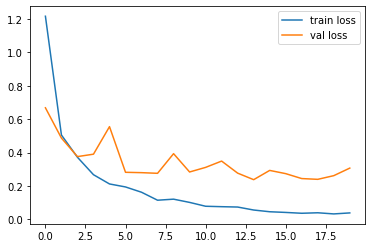

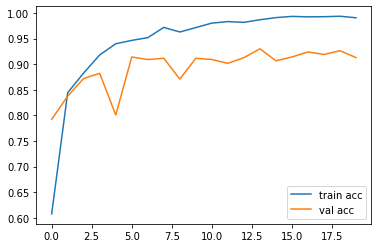

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_VGG19.h5')

In [20]:
y_pred = model.predict(test_set)
y_pred

26/26 [==============================] - 4s 152ms/step


array([[1.7940074e-05, 7.0646038e-08, 1.3074853e-09, ..., 9.9997711e-01,
        6.7607672e-08, 6.4443531e-09],
       [2.0124132e-04, 3.6153600e-05, 2.1113292e-06, ..., 1.3411111e-06,
        4.3406911e-07, 9.9974877e-01],
       [2.1704657e-03, 6.3419534e-04, 9.0814492e-06, ..., 2.8536466e-05,
        9.9611276e-01, 5.9878407e-04],
       ...,
       [7.9316916e-03, 3.2075902e-06, 4.8985650e-05, ..., 9.9173295e-01,
        2.4346548e-06, 2.8659968e-05],
       [9.9751043e-01, 2.8664927e-06, 1.2347987e-04, ..., 5.0269398e-07,
        3.2823844e-04, 4.0827814e-04],
       [1.2873393e-05, 3.4749326e-06, 9.9997842e-01, ..., 1.0126403e-06,
        8.4059457e-07, 3.3106696e-06]], dtype=float32)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=0)
y_pred

1

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_VGG19.h5')

In [26]:
img=image.load_img('/content/Dataset/Cars Dataset/test/Audi/1000.jpg',target_size=(224,224))



In [27]:
x=image.img_to_array(img)
x

array([[[ 15.,  21.,  37.],
        [ 15.,  21.,  37.],
        [ 15.,  21.,  37.],
        ...,
        [ 11.,  17.,  33.],
        [ 11.,  17.,  33.],
        [ 11.,  17.,  33.]],

       [[ 15.,  21.,  37.],
        [ 15.,  21.,  37.],
        [ 15.,  21.,  37.],
        ...,
        [ 11.,  17.,  33.],
        [ 11.,  17.,  33.],
        [ 11.,  17.,  33.]],

       [[ 16.,  22.,  38.],
        [ 16.,  22.,  38.],
        [ 16.,  22.,  38.],
        ...,
        [ 11.,  17.,  33.],
        [ 11.,  17.,  33.],
        [ 11.,  17.,  33.]],

       ...,

       [[ 94., 101., 109.],
        [ 93., 100., 108.],
        [ 96., 103., 111.],
        ...,
        [ 69.,  76.,  86.],
        [ 68.,  75.,  85.],
        [ 68.,  75.,  85.]],

       [[ 86.,  93., 101.],
        [ 91.,  98., 106.],
        [ 93., 100., 108.],
        ...,
        [ 67.,  74.,  84.],
        [ 68.,  75.,  85.],
        [ 69.,  76.,  86.]],

       [[ 77.,  84.,  92.],
        [ 71.,  78.,  86.],
        [ 77.,  

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

1/1 [==============================] - 1s 843ms/step


array([[6.6035049e-08, 2.3933211e-01, 2.6261511e-03, 4.2707013e-10,
        1.2259605e-06, 7.5804043e-01, 1.9619441e-15]], dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 20ms/step


In [35]:
a==1

array([False])